# Tensorflow

## 1. Introduction

TensorFlow is an open-source end-to-end machine learning library for preprocessing data, modelling data and serving models (getting them into the hands of others).

Tensors are kind of like Numpy Arrays (n-dimensional). Used to represent:
- Numbers
- Text
- Images
- Or other form of information



In [1]:
import tensorflow as tf

2024-04-11 22:18:59.687555: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-11 22:19:02.111519: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-11 22:19:02.111705: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-11 22:19:02.364053: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-11 22:19:03.098791: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-11 22:19:03.102654: I tensorflow/core/platform/cpu_feature_guard.cc:1

2024-04-11 22:19:10.344414: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Create a rank 0 tensor (scalar)
scalar = tf.constant(7)
scalar, scalar.ndim

(<tf.Tensor: shape=(), dtype=int32, numpy=7>, 0)

In [3]:
# Create a vector
vector = tf.constant([2, 1])
vector, vector.ndim

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 1], dtype=int32)>, 1)

## 2. Regression with Neural Networks

In [4]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


**Creating data to view and fit**

(TensorShape([100, 1]), TensorShape([100, 1]))

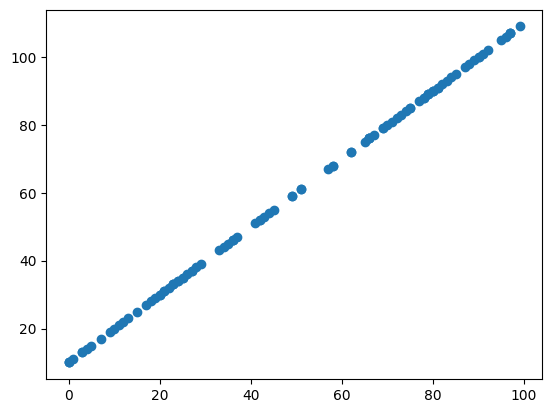

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.random.randint(0, 100, (100, 1))
y = X + 10

# Visualize
plt.scatter(X, y)

# Convert Numpy array's into Tensors
X = tf.constant(X)
y = tf.constant(y)

X.shape, y.shape

Input and Output Shapes

In [15]:
# Sample dataset
X = tf.range(-100, 100, 2)
y = X + 10
X_train, X_test = X[:70], X[70:]
y_train, y_test = y[:70], y[70:]

**Steps in modelling with Tensorflow**

1. Creating a model - definne the input, output and hidden layers.
2. Compile a model - define loss function, optimizer and evaluation metrics.
3. Fitting a model - letting model to find patterns between X & y.

In [16]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, input_shape = (1, ), activation='relu', name='hidden1'),
    tf.keras.layers.Dense(5, activation='relu', name='hidden2'),
    tf.keras.layers.Dense(5, activation='relu', name='hidden3'),
    tf.keras.layers.Dense(1, name='output')
], name="model")

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics = 'mae')

# 3. Fit the model
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
3/3 [==============================] - 1s 5ms/step - loss: 32.4371 - mae: 32.4371
Epoch 2/50
3/3 [==============================] - 0s 6ms/step - loss: 13.3526 - mae: 13.3526
Epoch 3/50
3/3 [==============================] - 0s 4ms/step - loss: 12.2113 - mae: 12.2113
Epoch 4/50
3/3 [==============================] - 0s 5ms/step - loss: 11.7418 - mae: 11.7418
Epoch 5/50
3/3 [==============================] - 0s 4ms/step - loss: 9.0784 - mae: 9.0784
Epoch 6/50
3/3 [==============================] - 0s 4ms/step - loss: 5.3874 - mae: 5.3874
Epoch 7/50
3/3 [==============================] - 0s 4ms/step - loss: 4.5035 - mae: 4.5035
Epoch 8/50
3/3 [==============================] - 0s 6ms/step - loss: 5.3165 - mae: 5.3165
Epoch 9/50
3/3 [==============================] - 0s 5ms/step - loss: 5.7168 - mae: 5.7168
Epoch 10/50
3/3 [==============================] - 0s 4ms/step - loss: 6.5915 - mae: 6.5915
Epoch 11/50
3/3 [==============================] - 0s 5ms/step - loss: 6.7439 - m

In [17]:
model.predict([40])

1/1 [==============================] - 0s 82ms/step


array([[43.870934]], dtype=float32)

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 5)                 10        
                                                                 
 hidden2 (Dense)             (None, 5)                 30        
                                                                 
 hidden3 (Dense)             (None, 5)                 30        
                                                                 
 output (Dense)              (None, 1)                 6         
                                                                 
Total params: 76 (304.00 Byte)
Trainable params: 76 (304.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


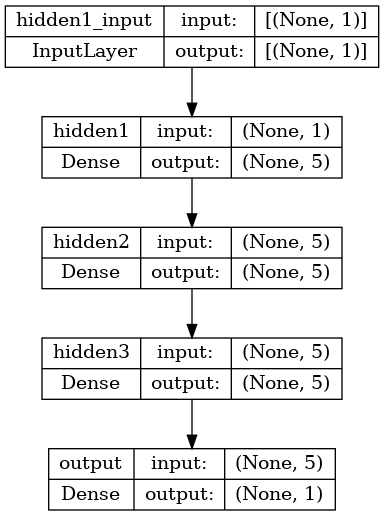

In [19]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

Build a model -> fit it -> evaluate it -> tweek the model -> fit it -> evaluate it -> tweek it ...

For evaluation:
> Visualize, visualize, visulaize

It's good idea to visualize:
* The data
* The model itself
* Training of a model
* The predictions of the model

In [22]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 70ms/step


array([[43.870934],
       [45.575344],
       [47.279755],
       [48.982975],
       [50.686028],
       [52.389065],
       [54.092106],
       [55.795155],
       [57.498207],
       [59.20125 ],
       [60.90429 ],
       [62.607338],
       [64.31039 ],
       [66.013435],
       [67.71647 ],
       [69.41951 ],
       [71.12256 ],
       [72.82561 ],
       [74.52864 ],
       [76.23169 ],
       [77.93473 ],
       [79.63779 ],
       [81.34083 ],
       [83.04386 ],
       [84.7469  ],
       [86.44996 ],
       [88.15299 ],
       [89.85604 ],
       [91.55889 ],
       [93.26173 ]], dtype=float32)

Visualize Predictions

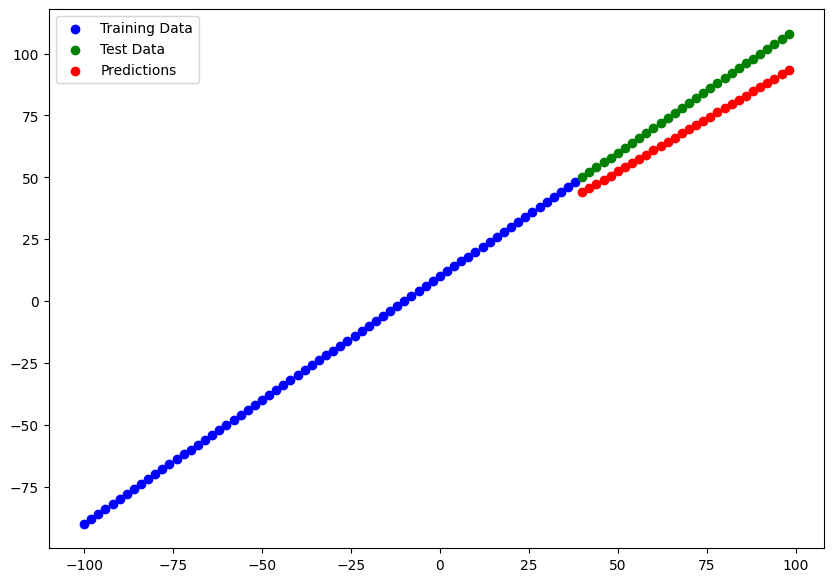

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(x=X_train, y=y_train, c='b', label='Training Data')
plt.scatter(x=X_test, y=y_test, c='g', label='Test Data')
plt.scatter(x=X_test, y=y_pred, c='r', label='Predictions')
plt.legend();


**Evaluating Predictions**

Evaluation metrics are used to evaluate models performance.

Two main metric for regression problems are:
- **Mean Absolute Error (MAE)**
- **Mean Squared Error (MSE)**

The lower each of these values the better.

`model.evaluate()` returns the loss of the model as setup during compile step.

In [25]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 244ms/step - loss: 10.4322 - mae: 10.4322


[10.432185173034668, 10.432185173034668]

In [27]:
y_test.shape, y_pred.shape

(TensorShape([30]), (30, 1))

In [34]:
# Calculate mae
mae = tf.metrics.mean_absolute_error(y_test, y_pred.squeeze()) # squeeze is used to make the shapes compatible
mae.numpy()

10.432185

In [36]:
# Calculate mse
mse = tf.metrics.mean_squared_error(y_test, y_pred.squeeze())
mse.numpy()

115.4357

**Saving our Experimrnts**

`Tensorboard`

`Weights and Biases`

**Saving our model**

In [38]:
model.save('saved-model') # This is saved model format, allows us to resume training where we left

INFO:tensorflow:Assets written to: saved-model/assets


INFO:tensorflow:Assets written to: saved-model/assets


In [39]:
# Saving model using HDF5 format
model.save('model.h5')

/home/sie/miniconda3/envs/env1/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [3]:
# # Downloading files from colab
# from google.colab import files 
# files.download('model.h5')
# !cp /source /destination

**A larger example**

In [4]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [120]:
# Read the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [121]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [122]:
insurance_one_hot = pd.get_dummies(insurance, dtype=int)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [134]:
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [136]:
# Creating model
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
                        metrics='mae')

history1 = insurance_model.fit(X_train, y_train, epochs=100, verbose=False)

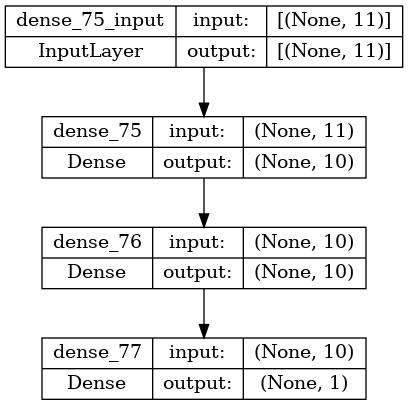

In [137]:
from tensorflow.keras.utils import plot_model
plot_model(insurance_model, show_shapes=True)

In [138]:
# Check error on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 5553.9766 - mae: 5553.9766


[5553.9765625, 5553.9765625]

In [139]:
# Second model
tf.random.set_seed(42)

insurance_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model2.compile(loss='mae',
                         optimizer='adam',
                         metrics='mae')

history2 = insurance_model2.fit(X_train, y_train, epochs=100, verbose=0)

In [140]:
insurance_model2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4831.3711 - mae: 4831.3711


[4831.37109375, 4831.37109375]

**How long to train**

EarlyStoppingCallback -> model stops trining once it stops improving

**Preprocessing Data (normalization and standardization)**

In [141]:
df = pd.read_csv('insurance.csv')
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [142]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # turn these numerical columns between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Create X and y
X = df.drop('charges', axis=1)
y = df['charges']

# Create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer to our training data
ct.fit(X_train)

# Transform our data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [143]:
# Second model
tf.random.set_seed(42)

insurance_model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model3.compile(loss='mae',
                         optimizer='adam',
                         metrics='mae')

history3 = insurance_model3.fit(X_train_normal, y_train, epochs=100, verbose=0)
insurance_model3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3433.1758 - mae: 3433.1758


[3433.17578125, 3433.17578125]

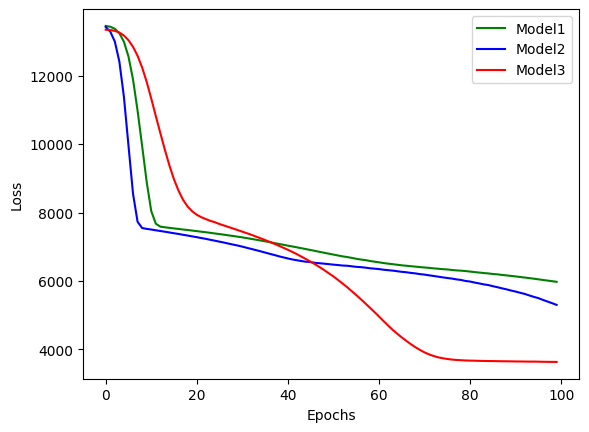

In [144]:
# Plot history
plt.plot(history1.history['loss'], color='g', label='Model1')
plt.plot(history2.history['loss'], color='b', label='Model2')
plt.plot(history3.history['loss'], color='r', label='Model3')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

## 3. Classification with Neural Networks

* Binary Classification
* Multiclass Classification
* Multilabel Classification

In [5]:
from sklearn.datasets import make_circles

# Number of samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

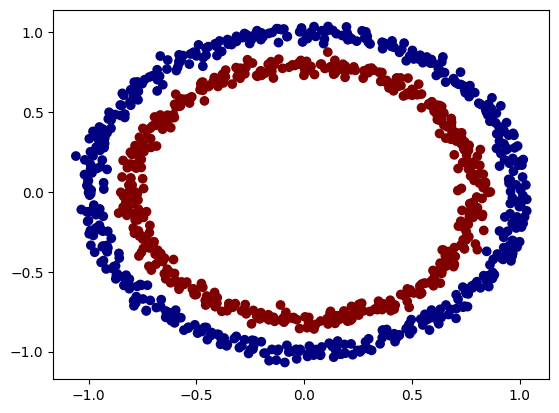

In [9]:
import pandas as pd
df = pd.DataFrame({'x0': X[:, 0], 'x1':X[:, 1], 'labels':y})

import matplotlib.pyplot as plt
plt.scatter(df.x0, df.x1, c=df.labels, cmap='jet');

In [53]:
# Creating a model
import tensorflow as tf

tf.random.set_seed(42)

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')
])

model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics='accuracy')

history1 = model1.fit(X, y, epochs=200, verbose=0)

313/313 [==============================] - 1s 2ms/step
Doing binary classification


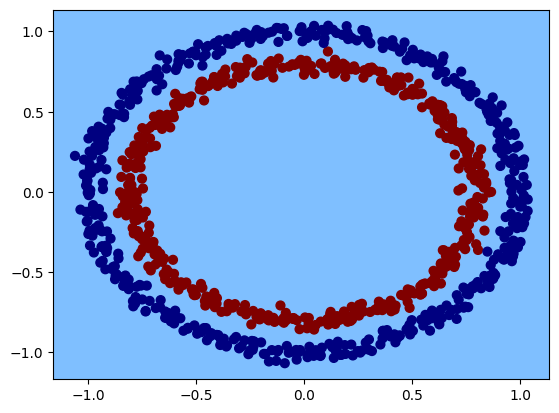

In [54]:
import numpy as np

def plot_decision_boundary(model, x, y):

    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Make data
    X_train = np.c_[xx.flatten(), yy.flatten()]

    # Make predictions
    y_pred = model.predict(X_train)

    # Check for multiclass
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap='jet', alpha=0.5)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap='jet')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    


plot_decision_boundary(model1, X, y)